<h1> Google Data Analytics Capstone Project </h1>

#### Author: Jeremy Jamero

#### Date Created: 6/9/2021

# How Can a Wellness Technology Company Play It Smart?

## Step One: **Ask**

#### The purpose of this case study is to determine the key usage of Fitbit smartwatches, to better help focus the marketing strategy for Bellabeat Smart Devices, a growing smart device maker with women as their key demographic.

#### Key Stakeholders
  *  Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
  *  Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
  *  Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy. You joined this team six months ago and have been busy learning about Bellabeat’’s mission and business goals — as well as how you, as a junior data analyst,can help Bellabeat achieve them.

### Business Objectives
-   What are some trends in smart device usage?
-   How can these trends apply to Bellabeat customers?
-   How can these trands influence Bellabeat marketing strategies?

### Purpose

#### The goal for this case study is mainly to determine daily device usage, to develop a marketing strategy that encourages activity on days where participants are seen to be least active.

### Data

 #### Sršen encourages us to use FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through    Mobius): This Kaggle dataset contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit   users consented to the submission of personal tracker data, including minute-level output for physical activity,   heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be   used to explore users’ habits.

## Step Two:  **Prepare** 

#### Now we will prepare the R environment



In [1]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gargle’, ‘ids’, ‘dbplyr’, ‘dtplyr’, ‘forcats’, ‘googledrive’, ‘googlesheets4’, ‘haven’, ‘lubridate’, ‘modelr’, ‘reprex’, ‘rvest’




In [2]:
install.packages("janitor")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("skimr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(tidyverse)
library(janitor)
library(skimr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




#### Now we will import the .csv files with which we will be working

In [5]:
daily_activity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_calories <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
daily_intensities <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
daily_steps <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
daily_sleep <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_log <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityDate = col_character(),
  TotalSteps = col_double(),
  TotalDistance = col_double(),
  TrackerDistance = col_double(),
  LoggedActivitiesDistance = col_double(),
  VeryActiveDistance = col_double(),
  ModeratelyActiveDistance = col_double(),
  LightActiveDistance = col_double(),
  SedentaryActiveDistance = col_double(),
  VeryActiveMinutes = col_double(),
  FairlyActiveMinutes = col_double(),
  LightlyActiveMinutes = col_double(),
  SedentaryMinutes = col_double(),
  Calories = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityDay = col_character(),
  Calories = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityDay = col_character(),
  SedentaryMinutes = col_double(),
  LightlyActiveMinutes = col_dou

#### Inspect each dataset

In [6]:
#daily_activity

#data is broken up into four levels of intensities

head(daily_activity)
glimpse(daily_activity)
n_distinct(daily_activity$Id)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

[1] 33

In [7]:
#daily calories

#here we will see how many participants use the fitbit to track daily calorie burn

head(daily_calories)
glimpse(daily_calories)
n_distinct(daily_calories$Id)

Id,ActivityDay,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,1985
1503960366,4/13/2016,1797
1503960366,4/14/2016,1776
1503960366,4/15/2016,1745
1503960366,4/16/2016,1863
1503960366,4/17/2016,1728


Rows: 940
Columns: 3
$ Id          <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960366…
$ ActivityDay <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/2016", "4/16/…
$ Calories    <dbl> 1985, 1797, 1776, 1745, 1863, 1728, 1921, 2035, 1786, 1775…


[1] 33

In [8]:
#daily intensities

#it will be important to know the average daily intensities to determine on which days users track their activity the most, to better market for days where participants are least active.

head(daily_intensities)
glimpse(daily_intensities)
n_distinct(daily_intensities$Id)

Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


Rows: 940
Columns: 10
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDay              <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ SedentaryMinutes         <dbl> 728, 776, 1218, 726, 773, 539, 1149, 775, 818…
$ LightlyActiveMinutes     <dbl> 328, 217, 181, 209, 221, 164, 233, 264, 205, …
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…


[1] 33

In [9]:
#daily steps

#it is seen to be helpful for people who are trying to lose weight to have a minimum step goal of 10k. 

head(daily_steps)
glimpse(daily_steps)
n_distinct(daily_steps$Id)

Id,ActivityDay,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,13162
1503960366,4/13/2016,10735
1503960366,4/14/2016,10460
1503960366,4/15/2016,9762
1503960366,4/16/2016,12669
1503960366,4/17/2016,9705


Rows: 940
Columns: 3
$ Id          <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960366…
$ ActivityDay <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/2016", "4/16/…
$ StepTotal   <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019, 15506, 1054…


[1] 33

In [10]:
#daily_sleep

#it is also recommended for people who are trying to lose weight to get a minimum of 7-9 hours of sleep per night (assuming participants are sleeping during the night)

#also note that not all participants are regularly monitoring their sleep habits

#data may still be useful

head(daily_sleep)
glimpse(daily_sleep)
n_distinct(daily_sleep$Id)


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM", "…
$ TotalSleepRecords  <dbl> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <dbl> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <dbl> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…


[1] 24

In [11]:
#weight log

#with only 8 distinct weight log records, it appears that either participants do not want their weight to be recorded, or it may be too tedious to self-enter weight daily.

#will look into this later

head(weight_log)
glimpse(weight_log)
n_distinct(weight_log$Id)


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


Rows: 67
Columns: 8
$ Id             <dbl> 1503960366, 1503960366, 1927972279, 2873212765, 2873212…
$ Date           <chr> "5/2/2016 11:59:59 PM", "5/3/2016 11:59:59 PM", "4/13/2…
$ WeightKg       <dbl> 52.6, 52.6, 133.5, 56.7, 57.3, 72.4, 72.3, 69.7, 70.3, …
$ WeightPounds   <dbl> 115.9631, 115.9631, 294.3171, 125.0021, 126.3249, 159.6…
$ Fat            <dbl> 22, NA, NA, NA, NA, 25, NA, NA, NA, NA, NA, NA, NA, NA,…
$ BMI            <dbl> 22.65, 22.65, 47.54, 21.45, 21.69, 27.45, 27.38, 27.25,…
$ IsManualReport <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, …
$ LogId          <dbl> 1.462234e+12, 1.462320e+12, 1.460510e+12, 1.461283e+12,…


[1] 8

## Step Three: **Process**

#### For this step we will clean the data and combine datasets that seem to have any interesting correlations reagarding individual participant fitness goals.

In [12]:
#comparing daily calories burned to daily steps

#summarize daily calories

daily_calories_summary <- daily_calories %>%
    group_by(Id)  %>%
    summarize(average_calories = mean(Calories))

head(daily_calories_summary)

#summarize daily steps

daily_steps_summary <- daily_steps %>%
    group_by(Id)  %>%
    summarize(average_steps = mean(StepTotal))

head(daily_steps_summary)

#combine tables to make calories and steps

calories_steps <- full_join(daily_calories_summary, daily_steps_summary, by = "Id")

calories_steps <- calories_steps %>%
   group_by(Id)  %>%
   mutate(average_calories = round(average_calories,2), average_steps = round(average_steps,2))
head(calories_steps)

Id,average_calories
<dbl>,<dbl>
1503960366,1816.419
1624580081,1483.355
1644430081,2811.300
1844505072,1573.484
1927972279,2172.806
2022484408,2509.968


Id,average_steps
<dbl>,<dbl>
1503960366,12116.742
1624580081,5743.903
1644430081,7282.967
1844505072,2580.065
1927972279,916.129
2022484408,11370.645


Id,average_calories,average_steps
<dbl>,<dbl>,<dbl>
1503960366,1816.42,12116.74
1624580081,1483.35,5743.90
1644430081,2811.30,7282.97
1844505072,1573.48,2580.06
1927972279,2172.81,916.13
2022484408,2509.97,11370.65


In [13]:
#comparing average calories burned to average sleep per day(night)

#since we already created a dataframe for average calories burned we will do the same process for average sleep and combine the two.

daily_sleep_summary <- daily_sleep %>%
    group_by(Id) %>%
    summarize(average_sleep = mean(TotalMinutesAsleep/60))

head(daily_sleep_summary)

calories_sleep <-  full_join(daily_calories_summary, daily_sleep_summary, by = "Id")

calories_sleep <- na.omit(calories_sleep)

#get rid of na values

#clean up decimal places

calories_sleep <- calories_sleep %>%
   group_by(Id)  %>%
   mutate(average_calories = round(average_calories,2), average_sleep = round(average_sleep,2))

head(calories_sleep)


Id,average_sleep
<dbl>,<dbl>
1503960366,6.004667
1644430081,4.900000
1844505072,10.866667
1927972279,6.950000
2026352035,8.436310
2320127002,1.016667


Id,average_calories,average_sleep
<dbl>,<dbl>,<dbl>
1503960366,1816.42,6.00
1644430081,2811.30,4.90
1844505072,1573.48,10.87
1927972279,2172.81,6.95
2026352035,1540.65,8.44
2320127002,1724.16,1.02


In [14]:
#we will compare daily intensities to daily calories burned

#summary of daily instensities

daily_intensities_summary <- daily_intensities %>%
   group_by(Id)  %>%
   summarize(average_VeryActiveMinutes = mean(VeryActiveMinutes), average_FairlyActiveMinutes = mean(FairlyActiveMinutes), 
   average_LightlyActiveMinutes = mean(LightlyActiveMinutes), average_SedentaryMinutes = mean(SedentaryMinutes)) %>%
   mutate(average_VeryActiveMinutes = round(average_VeryActiveMinutes,2),average_FairlyActiveMinutes = round(average_FairlyActiveMinutes,2), 
   average_LightlyActiveMinutes = round(average_LightlyActiveMinutes,2), average_SedentaryMinutes = round(average_SedentaryMinutes,2))

head(daily_intensities_summary)

#group daily intensities and daily calories

intensities_calories <- full_join(daily_calories_summary, daily_intensities_summary, by = "Id")

head(intensities_calories)




 

Id,average_VeryActiveMinutes,average_FairlyActiveMinutes,average_LightlyActiveMinutes,average_SedentaryMinutes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,38.71,19.16,219.94,848.16
1624580081,8.68,5.81,153.48,1257.74
1644430081,9.57,21.37,178.47,1161.87
1844505072,0.13,1.29,115.45,1206.61
1927972279,1.32,0.77,38.58,1317.42
2022484408,36.29,19.35,257.45,1112.58


Id,average_calories,average_VeryActiveMinutes,average_FairlyActiveMinutes,average_LightlyActiveMinutes,average_SedentaryMinutes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,1816.419,38.71,19.16,219.94,848.16
1624580081,1483.355,8.68,5.81,153.48,1257.74
1644430081,2811.300,9.57,21.37,178.47,1161.87
1844505072,1573.484,0.13,1.29,115.45,1206.61
1927972279,2172.806,1.32,0.77,38.58,1317.42
2022484408,2509.968,36.29,19.35,257.45,1112.58


In [15]:
#compare daily activity and weight log

#summarize weight log

weightlog_summary <- weight_log %>%
   group_by(Id)  %>%
   summarize(average_weight = mean(WeightPounds)) %>%
   mutate(average_weight = round(average_weight,2))

head(weightlog_summary)

#summarize daily activity

daily_activity_summary <- daily_activity %>%
    group_by(Id)  %>%
    summarize(average_VeryActiveMinutes =mean(VeryActiveMinutes), average_FairlyActiveMinutes = mean(FairlyActiveMinutes), 
    average_LightlyActiveMinutes = mean(LightlyActiveMinutes), average_SedentaryMinutes = mean(SedentaryMinutes)) %>%
   mutate(average_VeryActiveMinutes = round(average_VeryActiveMinutes,2),average_FairlyActiveMinutes = round(average_FairlyActiveMinutes,2), 
   average_LightlyActiveMinutes = round(average_LightlyActiveMinutes,2), average_SedentaryMinutes = round(average_SedentaryMinutes,2))


head(daily_activity_summary)

#now combine daily activity and weight log summaries

dailyActivity_weightlog <- full_join(daily_activity_summary, weightlog_summary, by = "Id")

head(dailyActivity_weightlog)

#remove na values

dailyActivity_weightlog2 <- na.omit(dailyActivity_weightlog)

head(dailyActivity_weightlog2)


dailyActivity_weightlog <- dailyActivity_weightlog2

dailyActivity_weightlog <- subset(dailyActivity_weightlog, select = -c(average_SedentaryMinutes))


head(dailyActivity_weightlog)





Id,average_weight
<dbl>,<dbl>
1503960366,115.96
1927972279,294.32
2873212765,125.66
4319703577,159.50
4558609924,153.53
5577150313,199.96


Id,average_VeryActiveMinutes,average_FairlyActiveMinutes,average_LightlyActiveMinutes,average_SedentaryMinutes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,38.71,19.16,219.94,848.16
1624580081,8.68,5.81,153.48,1257.74
1644430081,9.57,21.37,178.47,1161.87
1844505072,0.13,1.29,115.45,1206.61
1927972279,1.32,0.77,38.58,1317.42
2022484408,36.29,19.35,257.45,1112.58


Id,average_VeryActiveMinutes,average_FairlyActiveMinutes,average_LightlyActiveMinutes,average_SedentaryMinutes,average_weight
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,38.71,19.16,219.94,848.16,115.96
1624580081,8.68,5.81,153.48,1257.74,NA
1644430081,9.57,21.37,178.47,1161.87,NA
1844505072,0.13,1.29,115.45,1206.61,NA
1927972279,1.32,0.77,38.58,1317.42,294.32
2022484408,36.29,19.35,257.45,1112.58,NA


Id,average_VeryActiveMinutes,average_FairlyActiveMinutes,average_LightlyActiveMinutes,average_SedentaryMinutes,average_weight
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,38.71,19.16,219.94,848.16,115.96
1927972279,1.32,0.77,38.58,1317.42,294.32
2873212765,14.10,6.13,308.00,1097.19,125.66
4319703577,3.58,12.32,228.77,735.81,159.50
4558609924,10.39,13.71,284.97,1093.61,153.53
5577150313,87.33,29.83,147.93,754.43,199.96


Id,average_VeryActiveMinutes,average_FairlyActiveMinutes,average_LightlyActiveMinutes,average_weight
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,38.71,19.16,219.94,115.96
1927972279,1.32,0.77,38.58,294.32
2873212765,14.10,6.13,308.00,125.66
4319703577,3.58,12.32,228.77,159.50
4558609924,10.39,13.71,284.97,153.53
5577150313,87.33,29.83,147.93,199.96


### Step Four: **Analyze**

#### Here we will analyze the data by creating visualizations to get a better picture of what is happening with the data.

#### We will create graphs with the above combined datasets including:

- calories and steps
- calories and sleep
- intensity and calories
- daily activity and weight

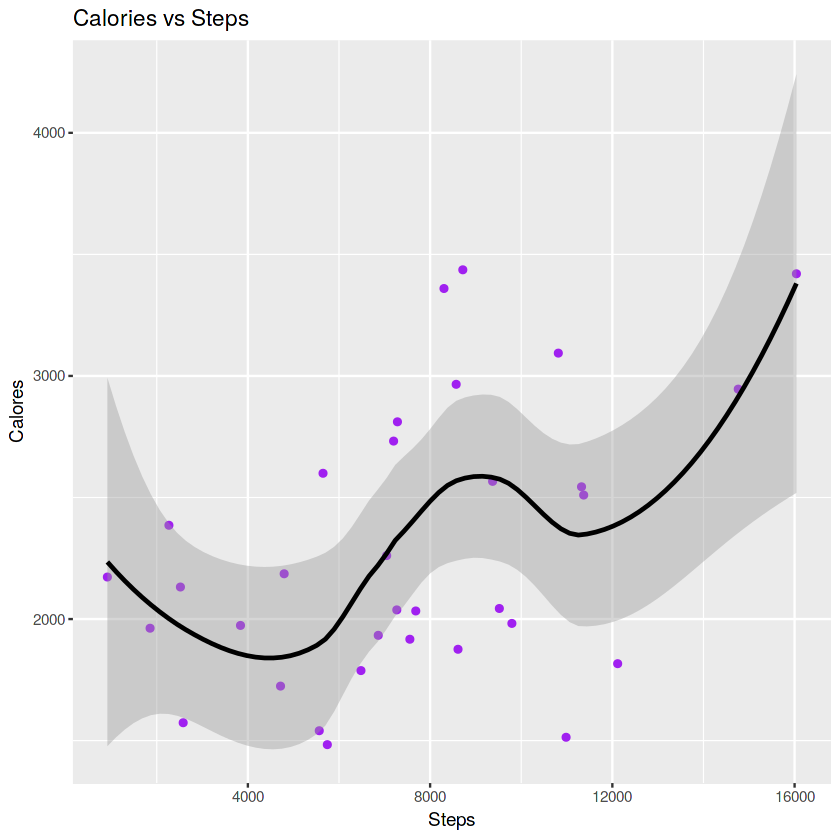

In [16]:
#calories vs steps graph

ggplot(data = calories_steps) +
    geom_point(mapping = aes(x = average_steps, y = average_calories),color = "purple") +
    geom_smooth(mapping = aes(x= average_steps, y = average_calories), method = loess, formula = y ~ x, color = "black") +
    labs(title = "Calories vs Steps") +
    labs(x = "Steps", y = "Calores")
  
    
       

#### The graph shows that there is mostly an upward trend of steps to calories, except in instances where calories burned are high compared to amount of steps. We can determine that in these instances the participants may be running as opposed to walking slowly.

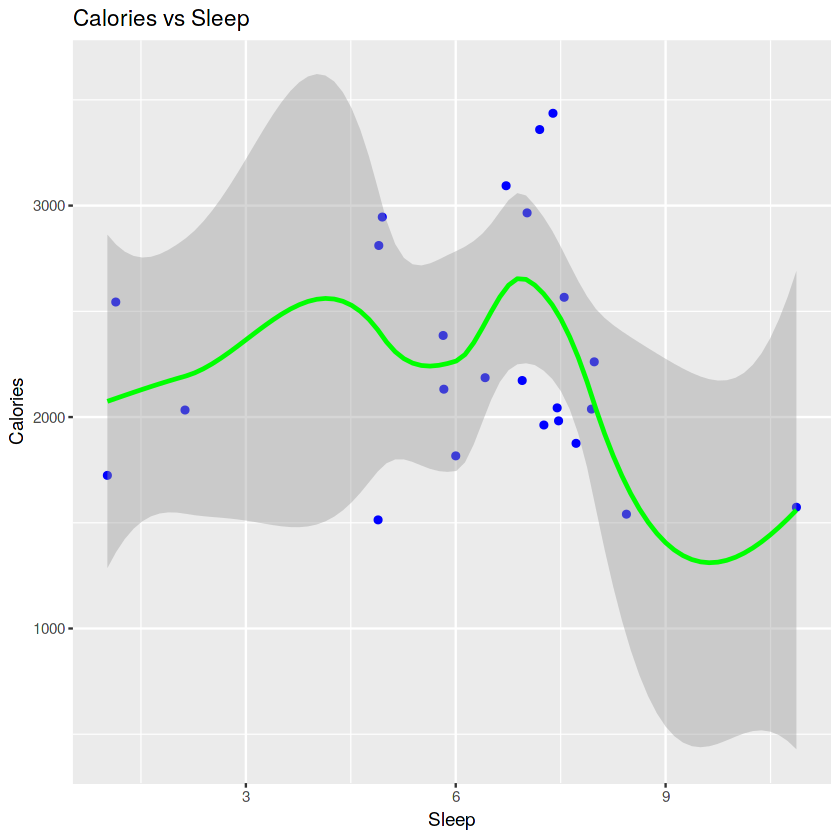

In [17]:
#compare average calories burned to average sleep

ggplot(data = calories_sleep) +
   geom_point(mapping = aes(x = average_sleep, y = average_calories), color = "blue") +
   geom_smooth(mapping = aes(x = average_sleep, y = average_calories), method = loess, formula = y ~ x, color = "green") +
   labs(title = "Calories vs Sleep")+
   labs(x = "Sleep", y = "Calories")


#### Looking at the graph, we can see that most participants are getting an average of 5-8 hours of sleep, but there is no real correlation between the amount of sleep to the amount of calories burned daily. This could be due to low amount of sleep tracking in participants.

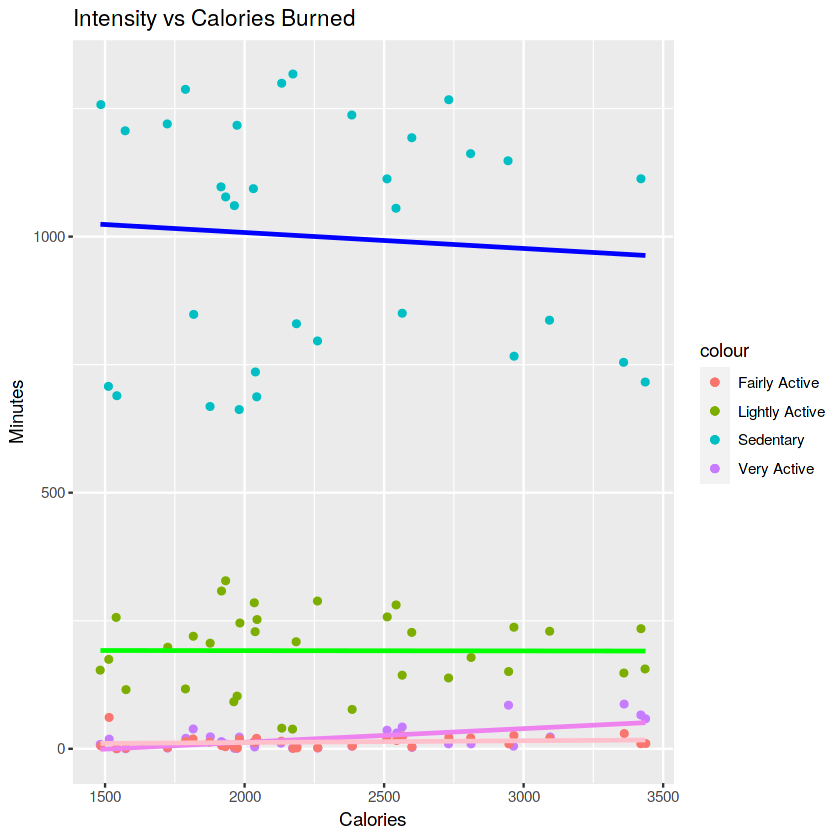

In [18]:
#compare daily intensities to calories burned

ggplot(intensities_calories, aes(x = average_calories)) +
  geom_jitter(aes(y = average_VeryActiveMinutes, color = "Very Active")) +
  geom_jitter(aes(y = average_FairlyActiveMinutes, color = "Fairly Active")) +
  geom_jitter(aes(y = average_LightlyActiveMinutes, color = "Lightly Active")) +
  geom_jitter(aes(y = average_SedentaryMinutes, color = "Sedentary")) +
  geom_smooth(aes(y = average_VeryActiveMinutes), method = lm, se = FALSE, formula = y ~ x, color = "Violet") +
  geom_smooth(aes(y = average_FairlyActiveMinutes), method = lm, se = FALSE, formula = y ~ x, color = "Pink") +
  geom_smooth(aes(y = average_LightlyActiveMinutes), method = lm, se = FALSE, formula = y ~ x, color = "Green") +
  geom_smooth(aes(y = average_SedentaryMinutes), method = lm, se = FALSE, formula = y ~ x, color = "Blue") +
  labs(x = "Calories", y = "Minutes") +
  labs(title = "Intensity vs Calories Burned")

#### Looking at the graph, we can see that there is a high amount of sendentary time tracked for participants, and the calorie expenditure is mostly in the 2000-3000 range. There is also an upward trend for both Fairly and Very Active minutes in relation to calorie expenditure, suggesting the more active the participant is, the more calories burned, which makes sense. 

Id,average_VeryActiveMinutes,average_FairlyActiveMinutes,average_LightlyActiveMinutes,average_weight
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,38.71,19.16,219.94,115.96
1927972279,1.32,0.77,38.58,294.32
2873212765,14.10,6.13,308.00,125.66
4319703577,3.58,12.32,228.77,159.50
4558609924,10.39,13.71,284.97,153.53
5577150313,87.33,29.83,147.93,199.96


Id,average_VeryActiveMinutes,average_FairlyActiveMinutes,average_LightlyActiveMinutes,average_weight,Total_Active_Minutes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,38.71,19.16,219.94,115.96,297.36
1927972279,1.32,0.77,38.58,294.32,41.22
2873212765,14.10,6.13,308.00,125.66,336.20
4319703577,3.58,12.32,228.77,159.50,235.93
4558609924,10.39,13.71,284.97,153.53,305.75
5577150313,87.33,29.83,147.93,199.96,322.59


Id,average_weight,Total_Active_Minutes
<dbl>,<dbl>,<dbl>
1503960366,115.96,297.36
1927972279,294.32,41.22
2873212765,125.66,336.20
4319703577,159.50,235.93
4558609924,153.53,305.75
5577150313,199.96,322.59
6962181067,135.70,291.43
8877689391,187.71,366.83


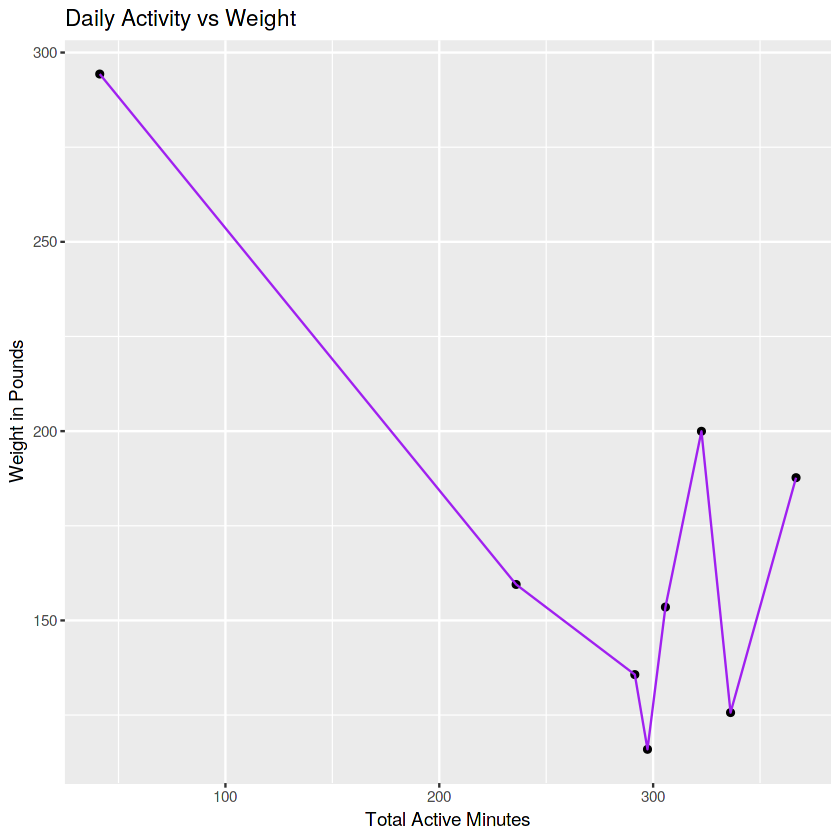

In [19]:
#compare daily activity and weight

head(dailyActivity_weightlog)

dailyActivity_weightlog2 <- dailyActivity_weightlog %>%
  group_by(Id)  %>%
  summarize(Id, average_VeryActiveMinutes, average_FairlyActiveMinutes, average_LightlyActiveMinutes, average_weight,
            Total_Active_Minutes = (average_VeryActiveMinutes + average_VeryActiveMinutes + average_LightlyActiveMinutes))

head(dailyActivity_weightlog2)

dailyActivity_weightlog_final <- subset(dailyActivity_weightlog2,select = -c(average_VeryActiveMinutes, average_FairlyActiveMinutes,average_LightlyActiveMinutes))

View(dailyActivity_weightlog_final)

ggplot(dailyActivity_weightlog_final, aes(x=Total_Active_Minutes, y=average_weight)) +

  geom_point(aes(x=Total_Active_Minutes, y=average_weight)) +
  geom_line(color = "Purple") +
  labs(x = "Total Active Minutes", y = "Weight in Pounds")+
  labs(title = "Daily Activity vs Weight")


#### Looking at the graph, there is not a strong correlation with active minutes and weight, besides participant 1927972279. Which leads me to believe that the data is not useable because of inconsistent weight logs. Also, without other factors including gender, height,and age, it is really difficult to come to any solid conclusions regarding weight and smart device usage.



## Step Five: **Key Takeaways**

#### While it was difficult to make any concrete correlations between activity and calorie expenditure/weight loss, this case study did show that users are consistently using their fitness trackers for step counting.  Some even agree that daily step counts of at least 10k can contribute to weight loss.

#### Another observation that can be noted is that participants are not using their smart devices consistently for either tracking sleeping habits, nor logging their daily weight.

###  **Marketing Recommendations**

> -   Engineer a device that is comfortable to wear in the day as well as night, to help incentivize sleep tracking. 

> -   Bellabeat may want to consider developing and selling a weight scale that can connect via Bluetooth to Bellabeat smart devices only, to encourage daily weight tracking which will in turn lead to user weight loss.

> -   Thirdly, Bellabeat can create a social media app for Bellabeat users only, where users can make connections, see other user's daily progress, achieve "trophies" based on activity, etc.
 


## Step Six: **Conclusion**

#### Although this dataset had plenty of data with which to work, there were some key elements missing to make a complete and thorough analysis.  Not knowing gender or age made it difficult to arrive at any real concrete resolutions.  That being said, I believe we did make some headway as far as marketing recommendations based on the data available.